<a href="https://colab.research.google.com/github/NicolasShirai/INEP-Analysis/blob/main/Projeto_INEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Tratamento de dados

In [ ]:
df = pd.read_excel('inep_enem_2021_editado.xlsx')
df.round(2)
df

NU_INSCRICAO SG_UF_PROVA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
0        210053865474          MG         NaN       574.6       472.6   
1        210052384164          AL       505.9       551.8       498.3   
2        210052589243          SP         NaN         NaN         NaN   
3        210052128335          CE       580.7       678.9       638.9   
4        210051353021          CE       497.7       532.4       457.6   
...               ...         ...         ...         ...         ...   
1048570  210053707471          MS         NaN       506.1       455.4   
1048571  210051469891          SP       472.7       646.3       584.1   
1048572  210051157856          SP       451.0       498.6       523.2   
1048573  210051126563          AL         NaN         NaN         NaN   
1048574  210052876324          PA       469.0       505.4       508.4   

         NU_NOTA_MT  NU_NOTA_REDACAO  
0               NaN            760.0  
1             461.5            560.0  
2               NaN              NaN  
3             659.5            780.0  
4             582.6            780.0  
...             ...              ...  
1048570         NaN            440.0  
1048571       501.6            720.0  
1048572       428.2            580.0  
1048573         NaN              NaN  
1048574       460.4            940.0  

[1048575 rows x 7 columns]

## Histogramas

<function matplotlib.pyplot.show(close=None, block=None)>

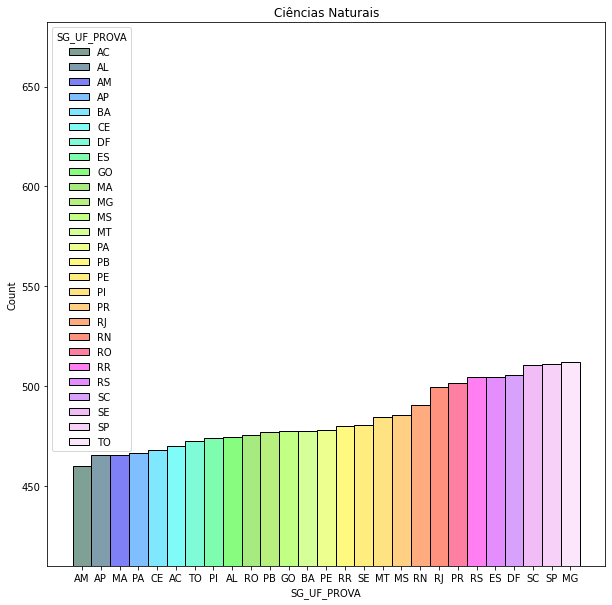

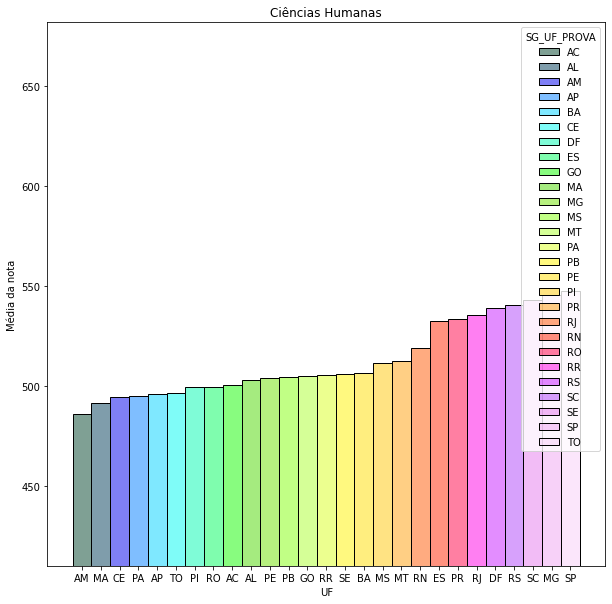

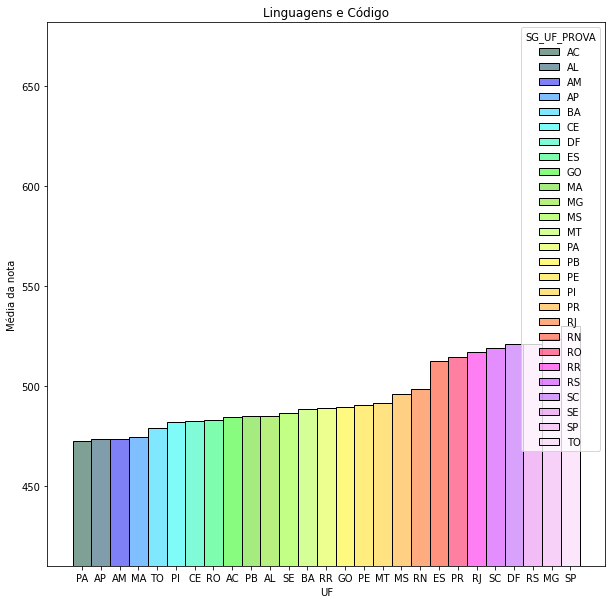

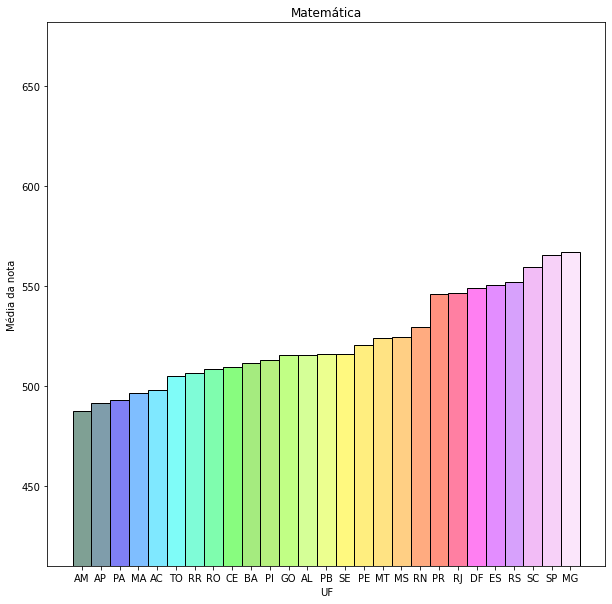

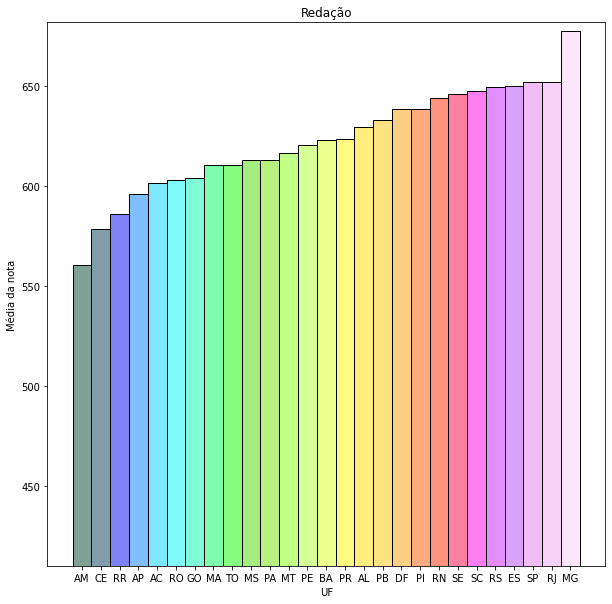

In [ ]:
# obs: se alguém souber como coloca as imagens uma do lado da outra me ajuda por favor

# Histograma CN
CN = df['NU_NOTA_CN'].groupby(df['SG_UF_PROVA'])
df_cn = pd.DataFrame(CN.mean()) # criando um data frame com a média da competência em cada um dos estados
hist_cn = plt.figure(figsize=(10,10))
df_cn_sorted = df_cn.sort_values(by='NU_NOTA_CN', ascending=True)
hist_cn = sns.histplot(x = df_cn_sorted.index, weights = df_cn_sorted['NU_NOTA_CN'], legend = True, binwidth = 1, hue = df_cn.index, palette = 'gist_ncar') # fazendo um histograma, no qual, no eixo x são os estados, e no eixo y a média de notas
plt.ylim(min(df_cn['NU_NOTA_CN'])-50, max(df_cn['NU_NOTA_CN'])+170) # fiz isso apenas pra deixar todos numa escala igual
plt.title('Ciências Naturais')

# Histograma CH
CH = df['NU_NOTA_CH'].groupby(df['SG_UF_PROVA'])
df_ch = pd.DataFrame(CH.mean())
hist_ch = plt.figure(figsize=(10,10))
df_ch_sorted = df_ch.sort_values(by='NU_NOTA_CH', ascending=True)
hist_ch = sns.histplot(x = df_ch_sorted.index, weights = df_ch_sorted['NU_NOTA_CH'], legend = True, binwidth = 1, hue = df_ch.index, palette = 'gist_ncar')
plt.title('Ciências Humanas')
plt.xlabel('UF')
plt.ylabel('Média da nota')
plt.ylim(min(df_cn['NU_NOTA_CN'])-50, max(df_cn['NU_NOTA_CN'])+170)

# Histograma LC
LC = df['NU_NOTA_LC'].groupby(df['SG_UF_PROVA'])
df_lc = pd.DataFrame(LC.mean())
hist_lc = plt.figure(figsize=(10,10))
df_lc_sorted = df_lc.sort_values(by='NU_NOTA_LC', ascending=True)
hist_lc = sns.histplot(x = df_lc_sorted.index, weights = df_lc_sorted['NU_NOTA_LC'], legend = True, binwidth = 1, hue = df_lc.index, palette = 'gist_ncar')
plt.title('Linguagens e Código')
plt.xlabel('UF')
plt.ylabel('Média da nota')
plt.ylim(min(df_cn['NU_NOTA_CN'])-50, max(df_cn['NU_NOTA_CN'])+170)

# Histograma MT
MT = df['NU_NOTA_MT'].groupby(df['SG_UF_PROVA'])
df_mt = pd.DataFrame(MT.mean())
hist_mt = plt.figure(figsize=(10,10))
df_mt_sorted = df_mt.sort_values(by='NU_NOTA_MT', ascending=True)
hist_mt = sns.histplot(x = df_mt_sorted.index, weights = df_mt_sorted['NU_NOTA_MT'], legend = False, binwidth = 1, hue = df_mt.index, palette = 'gist_ncar')
plt.title('Matemática')
plt.xlabel('UF')
plt.ylabel('Média da nota')
plt.ylim(min(df_cn['NU_NOTA_CN'])-50, max(df_cn['NU_NOTA_CN'])+170)

# Histograma RED
RED = df['NU_NOTA_REDACAO'].groupby(df['SG_UF_PROVA'])
df_red = pd.DataFrame(RED.mean())
hist_red = plt.figure(figsize=(10,10))
df_red_sorted = df_red.sort_values(by='NU_NOTA_REDACAO', ascending=True)
hist_red = sns.histplot(x = df_red_sorted.index, weights = df_red_sorted['NU_NOTA_REDACAO'], legend = False, binwidth = 1, hue = df_red.index, palette = 'gist_ncar')
plt.title('Redação')
plt.xlabel('UF')
plt.ylabel('Média da nota')
plt.ylim(min(df_cn['NU_NOTA_CN'])-50, max(df_cn['NU_NOTA_CN'])+170)


plt.show

## Usando o folium para criar mapa

In [ ]:
# https://medium.com/@louisartur53/an%C3%A1lise-e-visualiza%C3%A7%C3%A3o-espacial-de-dados-reais-em-python-com-folium-cd4650fc5930
import folium
import requests

mapa_brasil = folium.Map(location=[-22.7864889,-50.6786708],zoom_start=4,
                           tiles='Stamen Toner')
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}

url = "https://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&intrarregiao=UF" # pegando os dados das coordenadas de cada UF para montar o mapa
UF_jsons = requests.get(url,
                           headers=headers)
UF_json = UF_jsons.json()
UF_json #dicionário que possui além das coordenadas, algo chamado "codarea", que determina a qual estado se refere

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-62.4177, -13.1189],
      [-62.414, -13.1284],
      [-62.4073, -13.1239],
      [-62.3994, -13.1134],
      [-62.3949, -13.1187],
      [-62.3974, -13.1301],
      [-62.392, -13.1348],
      [-62.3825, -13.1308],
      [-62.3726, -13.1407],
      [-62.3609, -13.1399],
      [-62.352, -13.1433],
      [-62.3455, -13.1371],
      [-62.3305, -13.14],
      [-62.3214, -13.1521],
      [-62.3168, -13.1345],
      [-62.3059, -13.1395],
      [-62.2993, -13.1506],
      [-62.292, -13.1439],
      [-62.2847, -13.1421],
      [-62.2679, -13.1491],
      [-62.2554, -13.1445],
      [-62.2459, -13.1452],
      [-62.2437, -13.1307],
      [-62.245, -13.1208],
      [-62.2406, -13.1157],
      [-62.2296, -13.1216],
      [-62.2231, -13.1137],
      [-62.2148, -13.1113],
      [-62.2063, -13.1169],
      [-62.201, -13.1245],
      [-62.2002, -13.1506],
      [-62.1909, -13.1538]

In [ ]:
# associando a sigla de cada estado com o "codarea"

lista_ = []
estados = []
for i in df_red.index:
  a = 'https://servicodados.ibge.gov.br/api/v3/malhas/estados/' + str(i) +'?formato=application/vnd.geo+json'
  a_jsons = requests.get(a, headers=headers)
  a_json = a_jsons.json()
  d = a_json['features'][0]['properties']
  lista_.append(d)
  estados.append(i)

df_cod = pd.DataFrame(lista_, index = estados)
df_cod

codarea
AC      12
AL      27
AM      13
AP      16
BA      29
CE      23
DF      53
ES      32
GO      52
MA      21
MG      31
MS      50
MT      51
PA      15
PB      25
PE      26
PI      22
PR      41
RJ      33
RN      24
RO      11
RR      14
RS      43
SC      42
SE      28
SP      35
TO      17

In [ ]:
# juntando as informações de média de cada competência, com os estados e com 'codarea'

x = pd.concat([df_cn, df_ch, df_lc, df_mt, df_red], axis=1)
m = pd.merge(df_cod, x, how = 'inner', on = df_red.index)
m.index = df_cod['codarea']
m.drop('codarea', inplace=True, axis=1)
m.rename(columns={"key_0": "UF","NU_NOTA_CN": "CN", "NU_NOTA_CH": "CH", "NU_NOTA_LC": "LC", "NU_NOTA_MT": "MT", "NU_NOTA_REDACAO": "RED"}, inplace=True)

m['MEDIA_NOTAS'] = ((m['RED'] + m['CH'] + m['CN'] + m['MT'] + m['LC'])/5)
m = m.round(2)
m

UF      CN      CH      LC      MT     RED  MEDIA_NOTAS
codarea                                                         
12       AC  470.07  500.53  484.54  498.06  601.49       510.94
27       AL  474.52  502.76  484.88  515.48  629.67       521.46
13       AM  459.81  485.86  473.54  487.26  560.66       493.42
16       AP  465.37  495.80  473.48  491.17  596.28       504.42
29       BA  477.25  506.31  488.30  511.53  623.16       521.31
23       CE  467.68  494.58  482.42  509.39  578.52       506.52
53       DF  505.56  539.22  521.01  548.99  638.78       550.71
32       ES  504.53  532.61  512.19  550.30  650.07       549.94
52       GO  477.15  504.90  489.59  515.48  603.92       518.21
21       MA  465.41  491.58  474.16  496.33  610.75       507.64
31       MG  512.17  545.71  523.49  567.06  677.96       565.28
50       MS  485.17  511.44  496.01  524.61  613.09       526.07
51       MT  484.40  512.33  491.51  524.05  616.83       525.82
15       PA  466.59  495.01  472.37  493.01  613.10       508.02
25       PB  476.68  504.29  484.77  515.92  633.32       523.00
26       PE  478.10  504.00  490.28  520.48  620.53       522.68
22       PI  473.98  499.50  481.90  512.74  638.87       521.40
41       PR  501.21  533.30  514.17  545.89  623.58       543.63
33       RJ  499.21  535.53  516.95  546.38  652.09       550.03
24       RN  490.65  519.18  498.32  529.44  643.95       536.31
11       RO  475.16  499.50  482.88  508.47  603.35       513.87
14       RR  479.86  505.28  488.89  506.50  585.83       513.27
43       RS  504.34  540.70  521.01  551.92  649.69       553.53
42       SC  510.45  542.83  519.11  559.53  647.69       555.92
28       SE  480.40  505.85  486.33  516.12  646.34       527.01
35       SP  510.83  547.33  529.82  565.51  652.01       561.10
17       TO  472.33  496.22  478.99  504.79  610.85       512.63

In [ ]:
m2 = m.sort_values(by='codarea')
m2['num'] = range(0,27)
m2 = m2.round(2)
m2

UF      CN      CH      LC      MT     RED  MEDIA_NOTAS  num
codarea                                                              
11       RO  475.16  499.50  482.88  508.47  603.35       513.87    0
12       AC  470.07  500.53  484.54  498.06  601.49       510.94    1
13       AM  459.81  485.86  473.54  487.26  560.66       493.42    2
14       RR  479.86  505.28  488.89  506.50  585.83       513.27    3
15       PA  466.59  495.01  472.37  493.01  613.10       508.02    4
16       AP  465.37  495.80  473.48  491.17  596.28       504.42    5
17       TO  472.33  496.22  478.99  504.79  610.85       512.63    6
21       MA  465.41  491.58  474.16  496.33  610.75       507.64    7
22       PI  473.98  499.50  481.90  512.74  638.87       521.40    8
23       CE  467.68  494.58  482.42  509.39  578.52       506.52    9
24       RN  490.65  519.18  498.32  529.44  643.95       536.31   10
25       PB  476.68  504.29  484.77  515.92  633.32       523.00   11
26       PE  478.10  504.00  490.28  520.48  620.53       522.68   12
27       AL  474.52  502.76  484.88  515.48  629.67       521.46   13
28       SE  480.40  505.85  486.33  516.12  646.34       527.01   14
29       BA  477.25  506.31  488.30  511.53  623.16       521.31   15
31       MG  512.17  545.71  523.49  567.06  677.96       565.28   16
32       ES  504.53  532.61  512.19  550.30  650.07       549.94   17
33       RJ  499.21  535.53  516.95  546.38  652.09       550.03   18
35       SP  510.83  547.33  529.82  565.51  652.01       561.10   19
41       PR  501.21  533.30  514.17  545.89  623.58       543.63   20
42       SC  510.45  542.83  519.11  559.53  647.69       555.92   21
43       RS  504.34  540.70  521.01  551.92  649.69       553.53   22
50       MS  485.17  511.44  496.01  524.61  613.09       526.07   23
51       MT  484.40  512.33  491.51  524.05  616.83       525.82   24
52       GO  477.15  504.90  489.59  515.48  603.92       518.21   25
53       DF  505.56  539.22  521.01  548.99  638.78       550.71   26

In [ ]:
# adicionando no UF_json as médias das notas de cada estado

index = m.index

for state in UF_json['features']:
  # Converter de string para número (usado no índice da tabela com produção).
  codarea = state['properties']['codarea']
  # Busca do código de área no índice da linha da Tabela.
  if codarea in index:
    #print(dfs.loc[codarea,'PRODUÇÃO'])
    state['properties']['CN'] = float(m.loc[codarea,'CN'])
    state['properties']['CH'] = float(m.loc[codarea,'CH'])
    state['properties']['LC'] = float(m.loc[codarea,'LC'])
    state['properties']['MT'] = float(m.loc[codarea,'MT'])
    state['properties']['RED'] = float(m.loc[codarea,'RED'])
    state['properties']['MEDIA_NOTAS'] = float(m.loc[codarea,'MEDIA_NOTAS'])    
    state['properties']['UF'] = (m.loc[codarea,'UF']) 
  
UF_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-62.4177, -13.1189],
      [-62.414, -13.1284],
      [-62.4073, -13.1239],
      [-62.3994, -13.1134],
      [-62.3949, -13.1187],
      [-62.3974, -13.1301],
      [-62.392, -13.1348],
      [-62.3825, -13.1308],
      [-62.3726, -13.1407],
      [-62.3609, -13.1399],
      [-62.352, -13.1433],
      [-62.3455, -13.1371],
      [-62.3305, -13.14],
      [-62.3214, -13.1521],
      [-62.3168, -13.1345],
      [-62.3059, -13.1395],
      [-62.2993, -13.1506],
      [-62.292, -13.1439],
      [-62.2847, -13.1421],
      [-62.2679, -13.1491],
      [-62.2554, -13.1445],
      [-62.2459, -13.1452],
      [-62.2437, -13.1307],
      [-62.245, -13.1208],
      [-62.2406, -13.1157],
      [-62.2296, -13.1216],
      [-62.2231, -13.1137],
      [-62.2148, -13.1113],
      [-62.2063, -13.1169],
      [-62.201, -13.1245],
      [-62.2002, -13.1506],
      [-62.1909, -13.1538]

## Fazendo o mapa

In [ ]:
# escala de cores
myscale = (m['MEDIA_NOTAS'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()
import branca.colormap as cm
colormap = cm.LinearColormap(colors=['darkred', 'darkmagenta','deeppink','darkblue','darkturquoise','darkgreen'], index=myscale,vmin=min(myscale),vmax=max(myscale))
colormap

In [ ]:
uf_coord = {
	'AC': [-8.77, -70.55],
	'AL': [-9.62, -36.82],
	'AM': [-3.47, -65.10],
	'AP': [1.41, -51.77],
	'BA': [-13.29, -41.71],
	'CE': [-5.20, -39.53],
	'DF': [-15.83, -47.86],
	'ES': [-19.19, -40.34],
	'GO': [-15.98, -49.86],
	'MA': [-5.42, -45.44],
	'MT': [-12.64, -55.42],
	'MS': [-20.51, -54.54],
	'MG': [-18.10, -44.38],
	'PA': [-3.79, -52.48],
	'PB': [-7.28, -36.72],
	'PR': [-24.89, -51.55],
	'PE': [-8.38, -37.86],
	'PI': [-6.60, -42.28],
	'RJ': [-22.25, -42.66],
	'RN': [-5.81, -36.59],
	'RO': [-10.83, -63.34],
	'RS': [-30.17, -53.50],
	'RR': [1.99, -61.33],
	'SC': [-27.45, -50.95],
	'SE': [-10.57, -37.45],
	'SP': [-22.19, -48.79],
	'TO': [-9.46, -48.26]
}

In [ ]:
import folium
map = folium.Map(
    location=[-13.089461610967666, -55.910299337040286], zoom_start = 6,
    tiles='stamentoner'
) 

fgp = folium.FeatureGroup(name= 'Estados')

tooltip=folium.features.GeoJsonTooltip(
          fields=['UF','CN', 'CH', 'LC', 'MT', 'RED'],
          aliases=['Estado:','CN', 'CH', 'LC', 'MT', 'RED'],
          style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
  )


fgp.add_child(folium.GeoJson(data=UF_json,
                              tooltip=tooltip,
                              style_function = lambda x:{'fillColor':colormap(x['properties']['MEDIA_NOTAS']),
                                                        'fillcolor':'#black','fillOpacity':0.9,'weight':0.8})) 


map.add_child(fgp)
map.add_child(folium.LayerControl())
map

In [ ]:
import plotly
import io
import json
import base64
from IPython.display import Image


In [ ]:
pokemon_urls = {
    'AC': 'https://archives.bulbagarden.net/media/upload/thumb/f/fb/0001Bulbasaur.png/120px-0001Bulbasaur.png',
    'AL': 'https://archives.bulbagarden.net/media/upload/thumb/2/27/0004Charmander.png/70px-0004Charmander.png',
    'AP': 'https://archives.bulbagarden.net/media/upload/thumb/5/54/0007Squirtle.png/70px-0007Squirtle.png',
    'AM': 'https://archives.bulbagarden.net/media/upload/thumb/5/5e/0010Caterpie.png/70px-0010Caterpie.png',
    'BA': 'https://archives.bulbagarden.net/media/upload/thumb/3/36/0013Weedle.png/70px-0013Weedle.png',
    'CE': 'https://archives.bulbagarden.net/media/upload/thumb/0/0c/0016Pidgey.png/70px-0016Pidgey.png',
    'DF': 'https://archives.bulbagarden.net/media/upload/thumb/a/aa/0019Rattata.png/70px-0019Rattata.png',
    'ES': 'https://archives.bulbagarden.net/media/upload/thumb/d/d2/0023Ekans.png/70px-0023Ekans.png',
    'GO': 'https://archives.bulbagarden.net/media/upload/thumb/4/4a/0025Pikachu.png/70px-0025Pikachu.png',
    'MA': 'https://archives.bulbagarden.net/media/upload/thumb/e/e9/0027Sandshrew.png/70px-0027Sandshrew.png',
    'MT': 'https://archives.bulbagarden.net/media/upload/thumb/b/b2/0029Nidoran.png/70px-0029Nidoran.png',
    'MS': 'https://archives.bulbagarden.net/media/upload/thumb/8/8c/0032Nidoran.png/70px-0032Nidoran.png',
    'MG': 'https://archives.bulbagarden.net/media/upload/thumb/b/b7/0035Clefairy.png/70px-0035Clefairy.png',
    'PA': 'https://archives.bulbagarden.net/media/upload/thumb/3/3a/0039Jigglypuff.png/70px-0039Jigglypuff.png',
    'PB': 'https://archives.bulbagarden.net/media/upload/thumb/4/4c/0041Zubat.png/70px-0041Zubat.png',
    'PR': 'https://archives.bulbagarden.net/media/upload/thumb/8/8a/0046Paras.png/70px-0046Paras.png',
    'PE': 'https://archives.bulbagarden.net/media/upload/thumb/a/a6/0050Diglett.png/70px-0050Diglett.png',
    'PI': 'https://archives.bulbagarden.net/media/upload/thumb/d/d6/0052Meowth.png/70px-0052Meowth.png',
    'RJ': 'https://archives.bulbagarden.net/media/upload/thumb/f/fa/0056Mankey.png/70px-0056Mankey.png',
    'RN': 'https://archives.bulbagarden.net/media/upload/thumb/6/6a/0058Growlithe.png/70px-0058Growlithe.png',
    'RO': 'https://archives.bulbagarden.net/media/upload/thumb/3/3f/0054Psyduck.png/70px-0054Psyduck.png',
    'RS': 'https://archives.bulbagarden.net/media/upload/thumb/4/4c/0133Eevee.png/70px-0133Eevee.png',
    'RR': 'https://archives.bulbagarden.net/media/upload/thumb/d/d1/0129Magikarp.png/70px-0129Magikarp.png',
    'SC': 'https://archives.bulbagarden.net/media/upload/thumb/8/8e/0137Porygon.png/70px-0137Porygon.png',
    'SE': 'https://archives.bulbagarden.net/media/upload/thumb/a/ae/0147Dratini.png/70px-0147Dratini.png',
    'SP': 'https://archives.bulbagarden.net/media/upload/thumb/3/38/0120Staryu.png/70px-0120Staryu.png',
    'TO': 'https://archives.bulbagarden.net/media/upload/thumb/1/16/0109Koffing.png/70px-0109Koffing.png'
}


In [ ]:
estado_imagem = {}
for estado in pokemon_urls.keys():
    urls = pokemon_urls[estado]
    estado_imagem[estado] = Image(url=urls, width=250, height=250)


In [ ]:
estado_imagem

{'AC': <IPython.core.display.Image object>,
 'AL': <IPython.core.display.Image object>,
 'AP': <IPython.core.display.Image object>,
 'AM': <IPython.core.display.Image object>,
 'BA': <IPython.core.display.Image object>,
 'CE': <IPython.core.display.Image object>,
 'DF': <IPython.core.display.Image object>,
 'ES': <IPython.core.display.Image object>,
 'GO': <IPython.core.display.Image object>,
 'MA': <IPython.core.display.Image object>,
 'MT': <IPython.core.display.Image object>,
 'MS': <IPython.core.display.Image object>,
 'MG': <IPython.core.display.Image object>,
 'PA': <IPython.core.display.Image object>,
 'PB': <IPython.core.display.Image object>,
 'PR': <IPython.core.display.Image object>,
 'PE': <IPython.core.display.Image object>,
 'PI': <IPython.core.display.Image object>,
 'RJ': <IPython.core.display.Image object>,
 'RN': <IPython.core.display.Image object>,
 'RO': <IPython.core.display.Image object>,
 'RS': <IPython.core.display.Image object>,
 'RR': <IPython.core.display.Ima

<ipython-input-28-c1bf158dbf01>:27: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



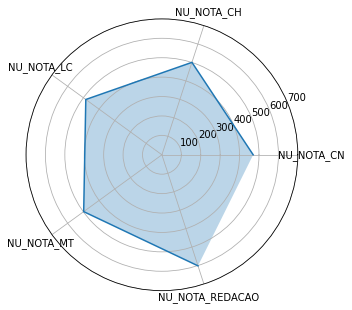

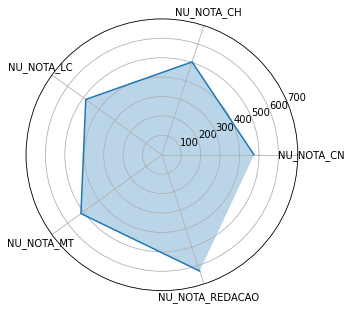

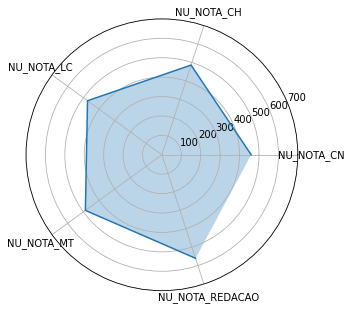

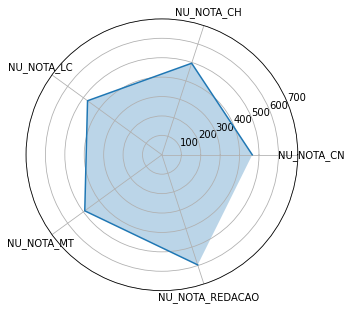

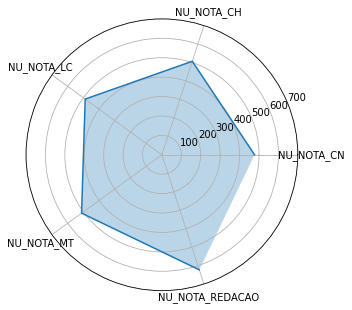

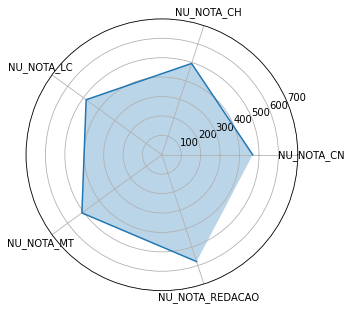

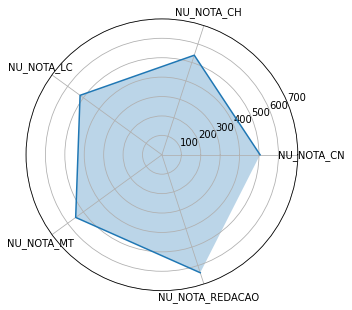

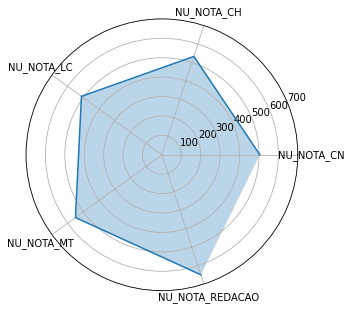

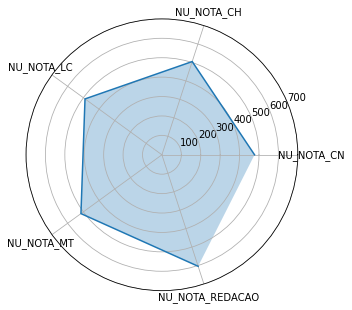

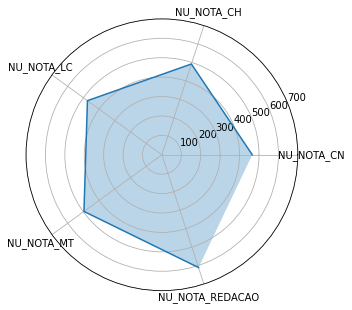

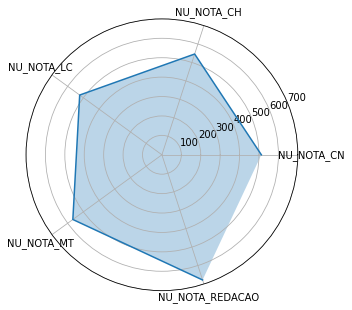

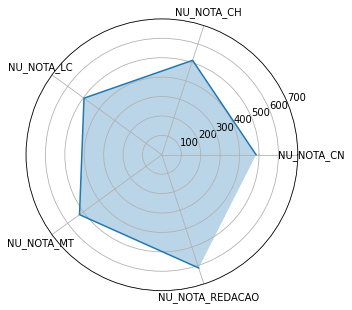

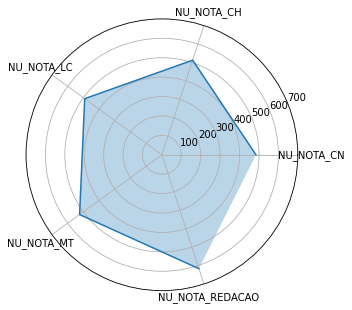

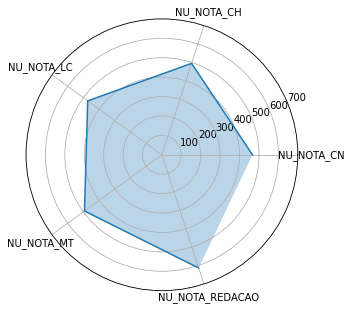

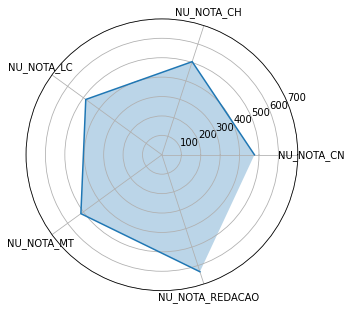

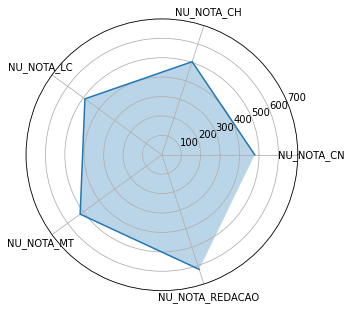

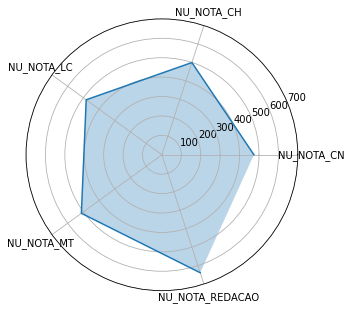

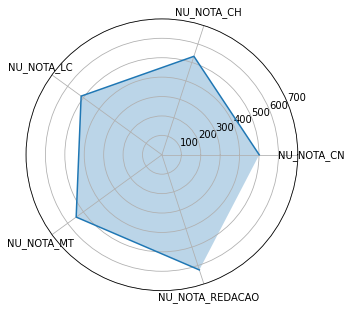

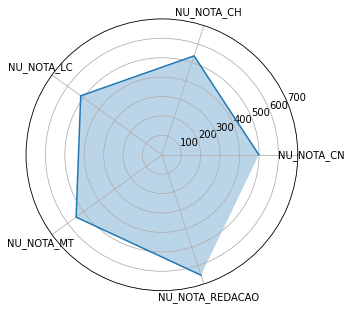

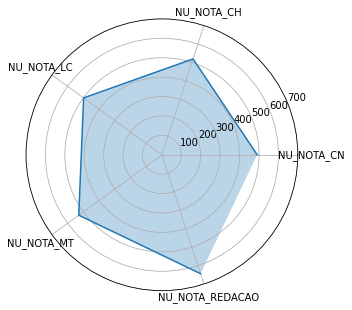

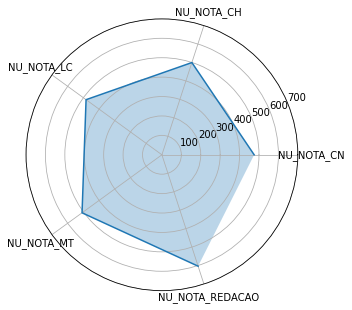

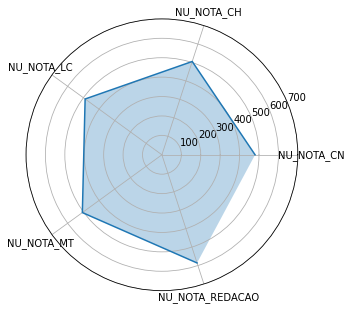

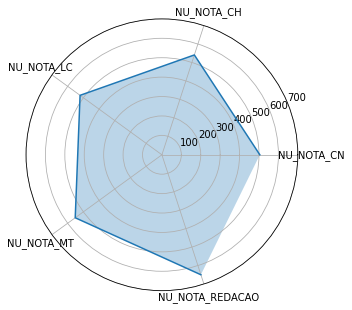

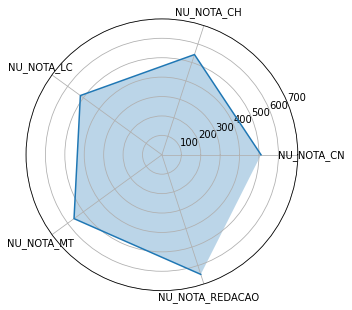

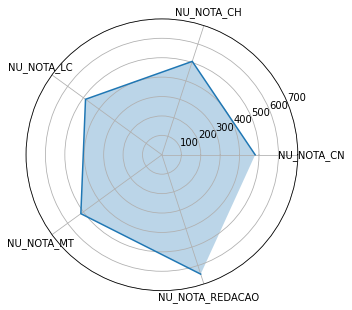

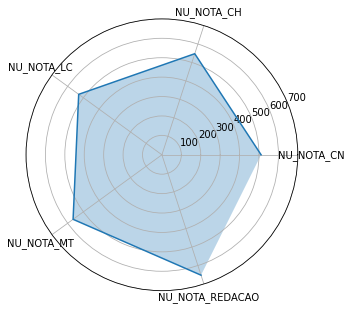

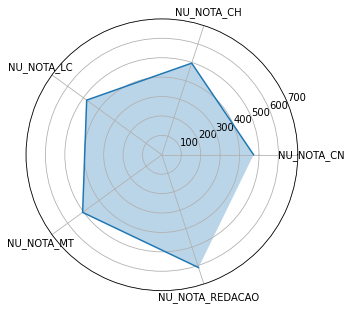

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np

pio.orca.config.use_xvfb = True  # opcional, necessário apenas para o ambiente headless (ex: servidor)

df_mean = df.drop('NU_INSCRICAO', axis=1).groupby('SG_UF_PROVA').mean()


import plotly.graph_objs as go
import plotly.io as pio
import numpy as np

pio.orca.config.use_xvfb = True  # opcional, necessário apenas para o ambiente headless (ex: servidor)

df_mean = df.drop('NU_INSCRICAO', axis=1).groupby('SG_UF_PROVA').mean()


for state in df_mean.index:
    # Criar um dicionário de dados para o Estado
    data_dict = df_mean.loc[state].to_dict()
    data_dict['NU_NOTA_REDACAO'] = df_mean.loc[state, 'NU_NOTA_REDACAO']



    # Criar um gráfico de radar para o Estado 
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    
    theta = np.linspace(0, (4*2 * np.pi)/5, len(data_dict.keys()))

    ax.plot(theta, list(data_dict.values()))
    ax.fill(theta, list(data_dict.values()), alpha=0.3, )
    ax.set_thetagrids(range(0, 360, int(360/len(data_dict.keys()))),labels=(data_dict.keys()))
    ax.set_rticks([100, 200, 300, 400, 500, 600, 700])

    #ax.set_rlabel_position(0)
    ax.grid(True)

    # Salvar o gráfico como imagem e converter em base64
    img = io.BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight')
    img.seek(0)
    img_base64 = base64.b64encode(img.getvalue()).decode('utf-8').replace('\n', '')

       # Adicionar a imagem ao popup do marcador correspondente ao estado
    html = f'<img src="data:image/png;base64,{img_base64}">'
    popup = folium.Popup(html, max_width=400)
    if state in pokemon_urls:
          # Salvar o gráfico como imagem e converter em base64
      img = io.BytesIO()
      plt.savefig(img, format='png', bbox_inches='tight')
      img.seek(0)
      img_base64 = base64.b64encode(img.getvalue()).decode('utf-8').replace('\n', '')
          # Carregar a imagem do pokémon correspondente ao estado
      img_url = pokemon_urls[state]
      response = requests.get(img_url)
      img_data = response.content
      img_base64 = base64.b64encode(img_data).decode()
        # Criar o marcador com a imagem do pokémon
      icon = folium.features.CustomIcon(
            'data:image/png;base64,{}'.format(img_base64),
            icon_size=(40, 40))
      folium.Marker(
            location=uf_coord[state],
            popup=popup,
            icon=icon,
            tooltip=state
        ).add_to(map)


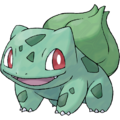
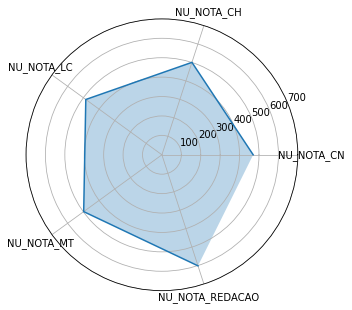
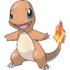
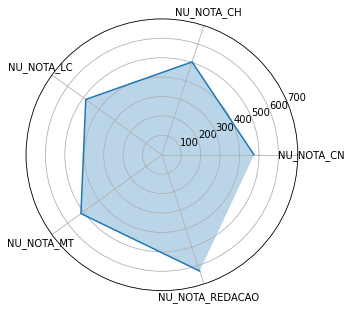
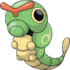
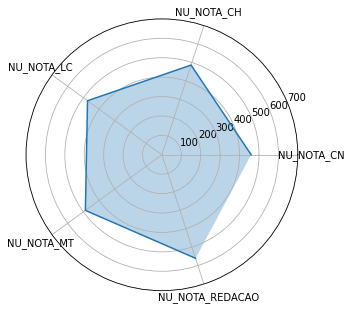
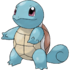
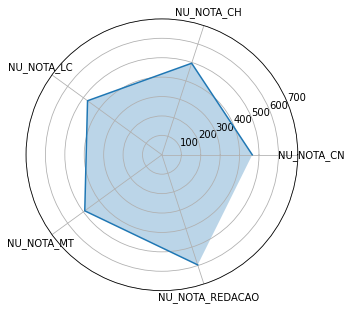
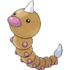
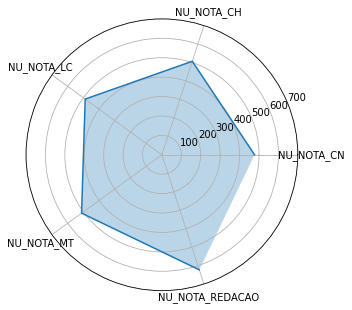
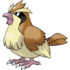
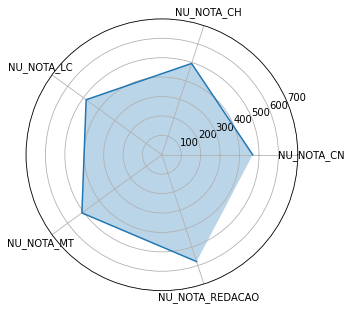
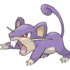
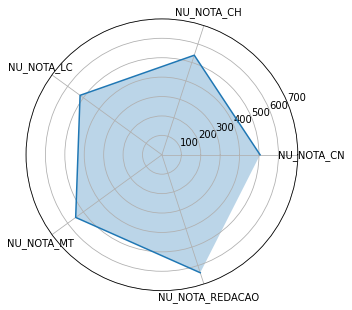
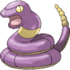
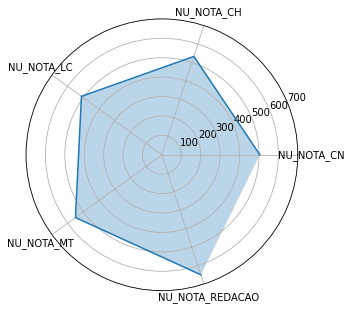
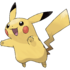
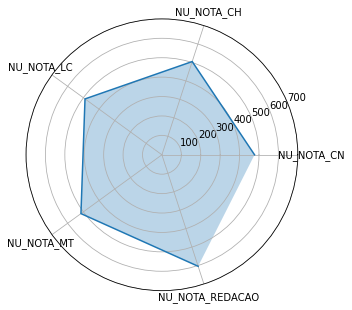
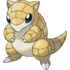
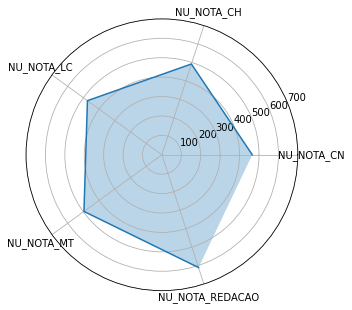
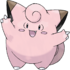
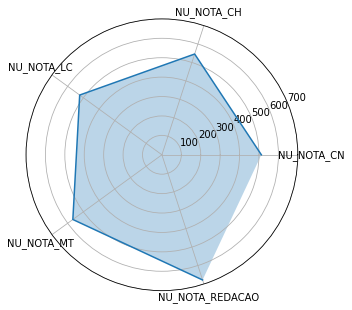
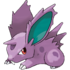
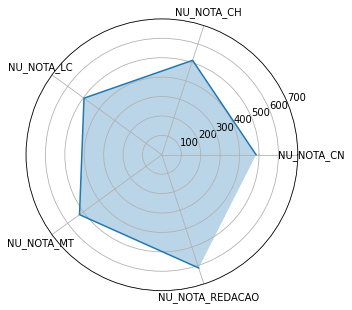
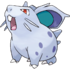
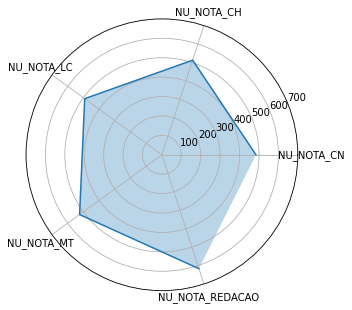
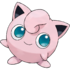
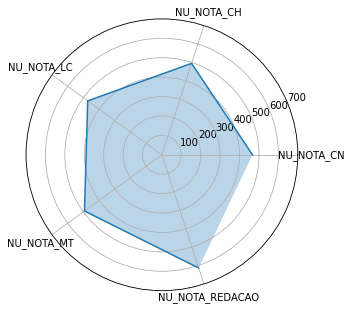
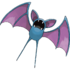
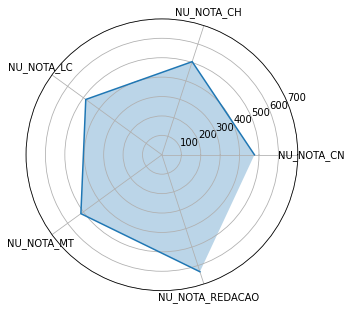
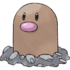
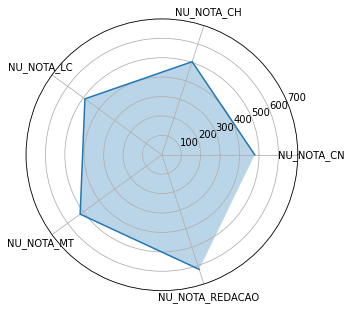
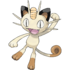
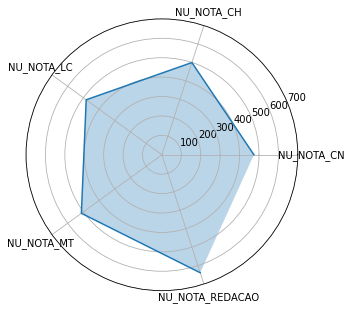
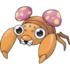
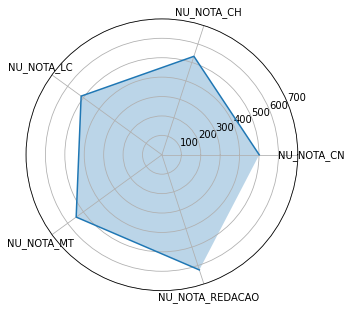
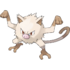
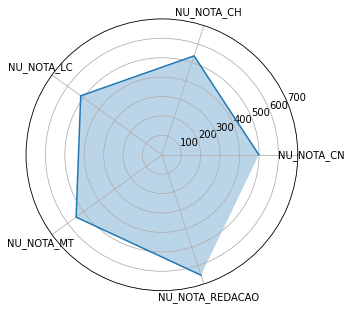
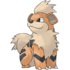
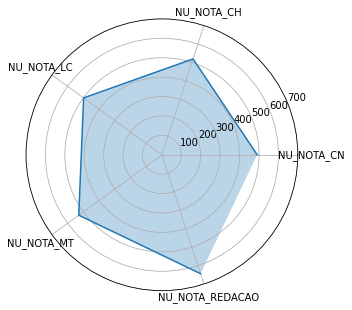
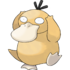
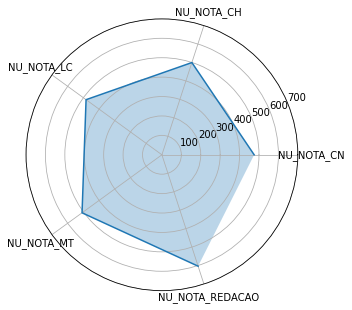
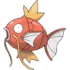
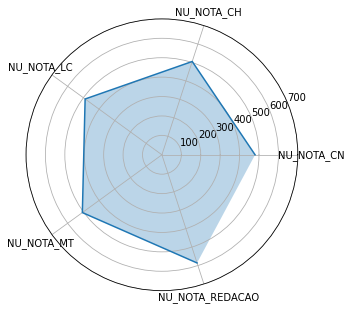
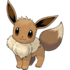
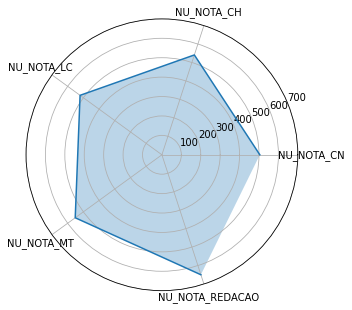
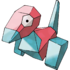
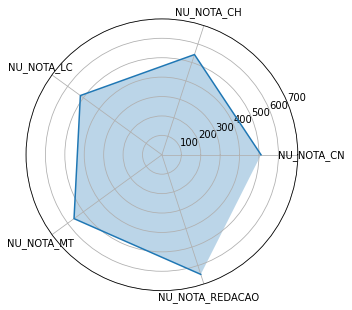
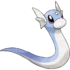
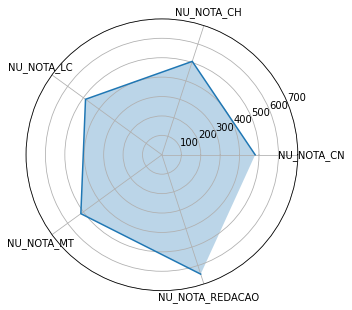
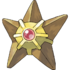
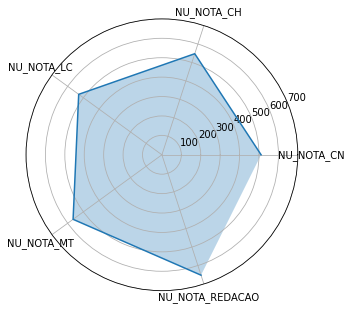
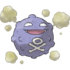
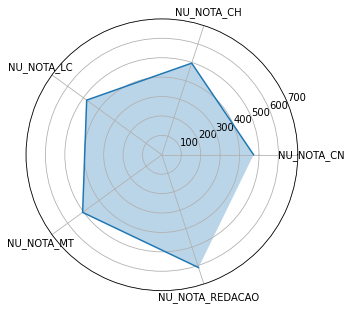

In [ ]:
map